<img src="https://cryptoholics.com/wp-content/uploads/Binance-Coin.png">

In this article, we will figure out how to foresee a sign that shows regardless of whether purchasing a specific stock will be useful by utilizing ML.

How about we start by bringing in certain libraries which will be utilized for different purposes which will be made sense of later in this article.

The candle schematics will help us to understand better about the data.

<img src="https://hounaar.com/github/BNB_prediction/candel_schemes_1.png">

<ul>
<li>
Pandas - This library assists with stacking the information outline in a 2D exhibit design and has numerous capabilities to perform examination undertakings in one go.
</li>

<li>
Numpy - Numpy exhibits are extremely quick and can perform enormous calculations in an exceptionally brief time frame.
</li>

<li>
Matplotlib/Seaborn - This library is utilized to draw perceptions.</li>

<li>
Sklearn - This module contains different libraries having pre-executed capabilities to 
perform undertakings from information preprocessing to show advancement and assessment.</li>
<li>

XGBoost - This contains the Outrageous Angle Supporting AI calculation which is one of the calculations which assists us with accomplishing high precision on expectations.</li>

</ul>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


Now we need to read our data file to analyze

In [42]:
df = pd.read_csv('coin_BinanceCoin.csv')
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0


Here we can set the Close price as our main value to be plotter

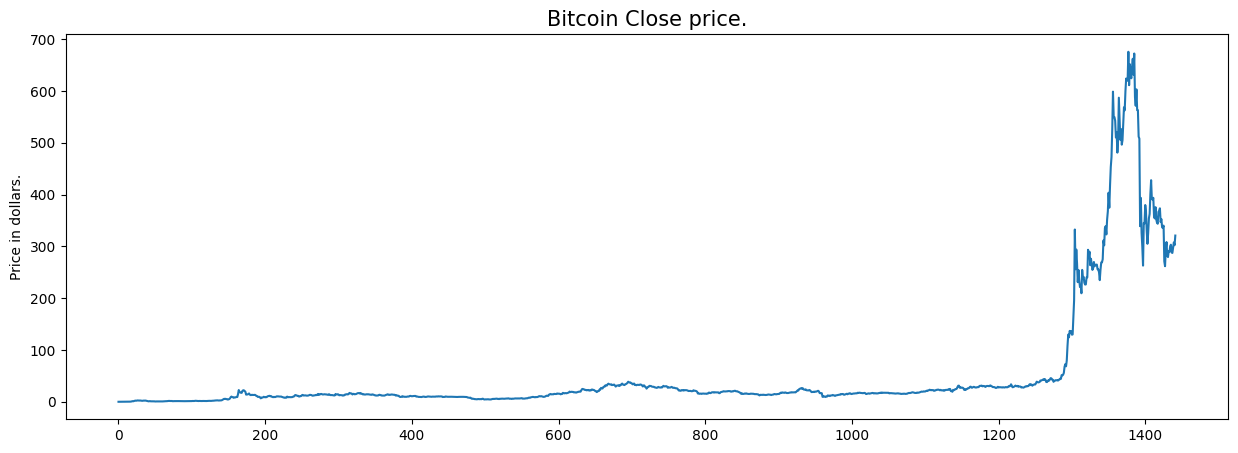

In [43]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('BNB Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

Now, here we have set some features (Some columns) to be plotted each one on the specific chart. Also we have declared some variables to provide no null values in our dataset.

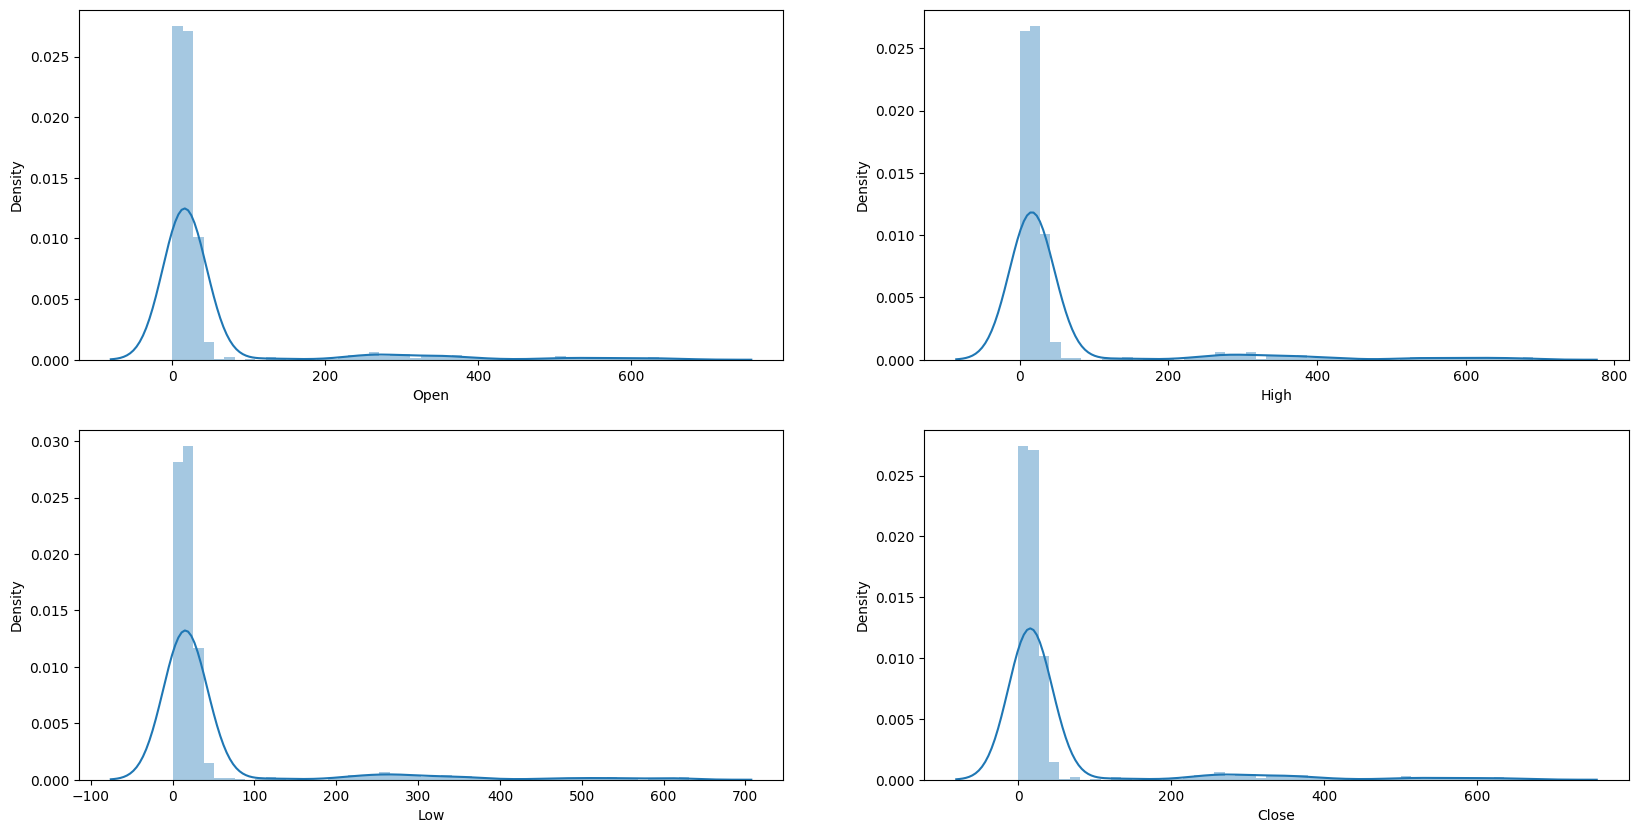

In [46]:
features = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.distplot(df[col])
plt.show()

Boxplot is being plotted here.

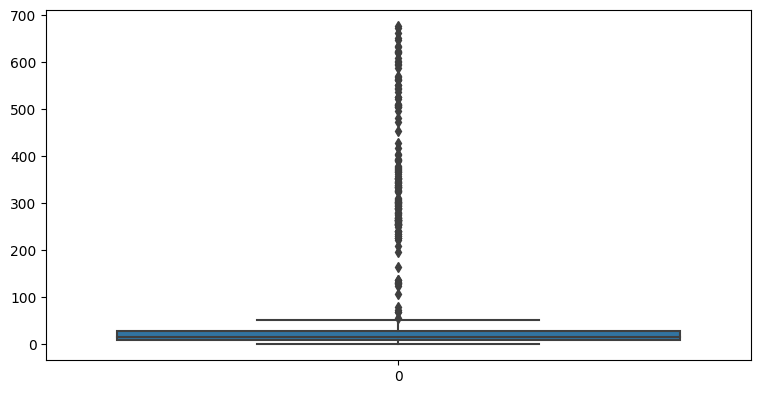

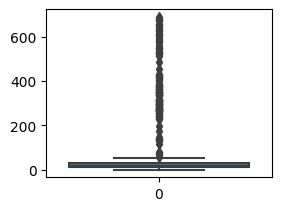

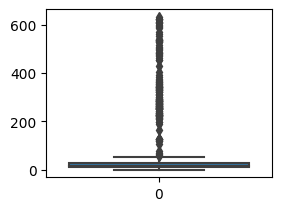

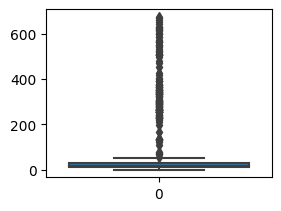

In [47]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[col])
    plt.show()


Ok, here we need to split the Data into some other categories. of course more details here is unnecessary and we need Year attribute mostly. Therefore we splitted the year as Int

In [50]:
splitted = df['Date'].str.split('-', expand=True)
 
df['year'] = splitted[0].astype('int')

df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,year,month
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0,2017,7
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0,2017,7
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0,2017,7
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0,2017,7
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0,2017,7


Now here we can group the data to demonstrate how excatly is the average or mean in each year. Our mean attributes are Open, Close, High, Low.

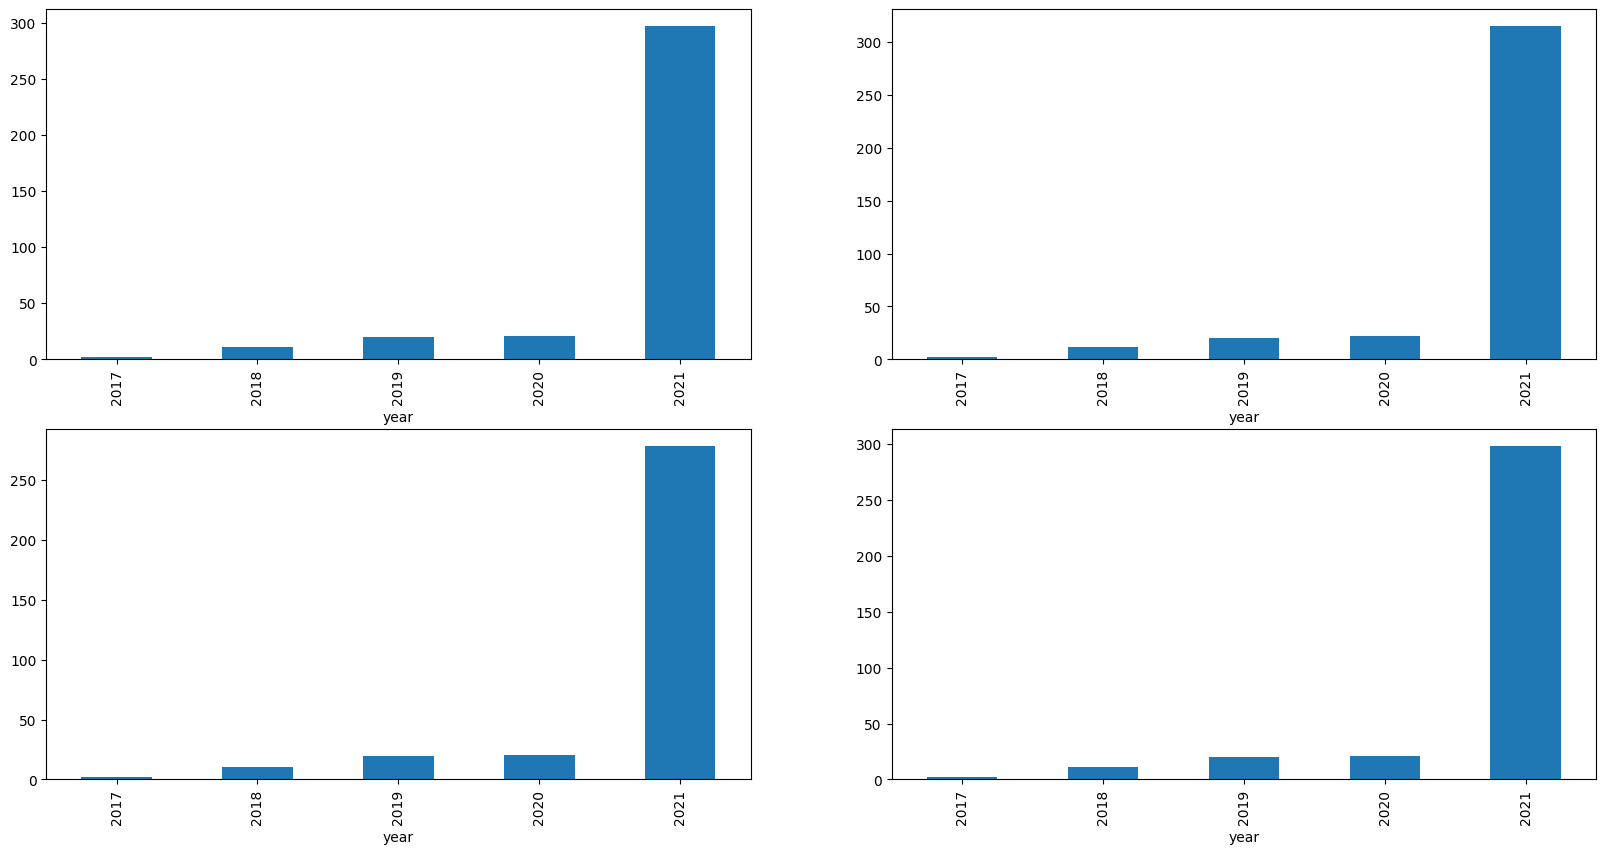

In [51]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [52]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. But before proceeding let’s check whether the target is balanced or not using a pie chart.

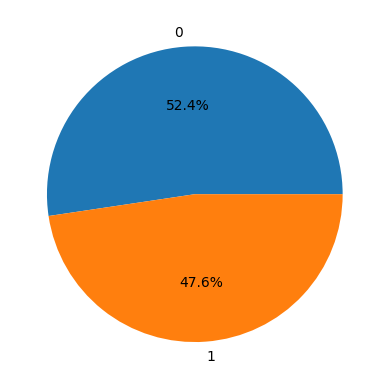

In [53]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

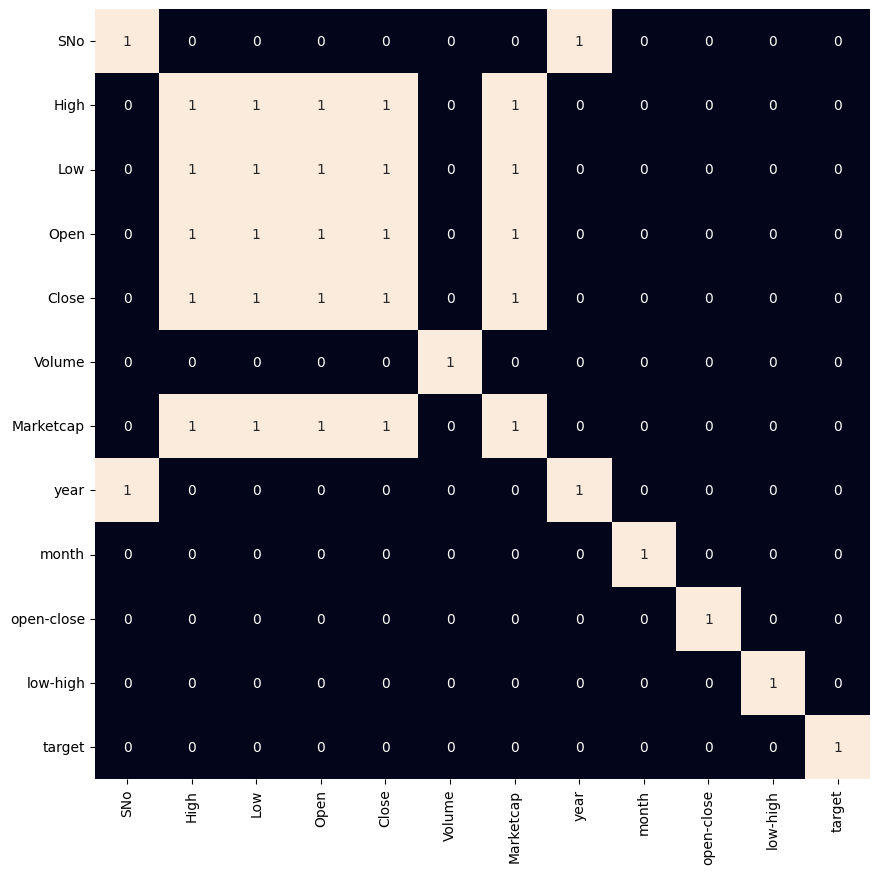

In [55]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


From the above heatmap, we can say that there is a high correlation between OHLC which is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

Prediction initiation

In [57]:
features = df[['open-close', 'low-high']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(1297, 2) (145, 2)


Now is the time to train some state-of-the-art machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

In [59]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()


LogisticRegression() : 
Training Accuracy :  0.5415042645447181
Validation Accuracy :  0.5593187906620742

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5266260065754991
Validation Accuracy :  0.5593187906620743

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) : 
Training Accuracy :  0.9827976842807451
Validation Ac

Now let’s plot a confusion matrix for the validation data.

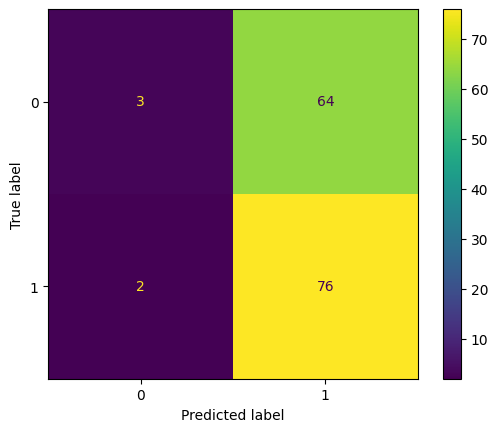

In [60]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()

<b>I hope you have enjoyed it</b>